In [ ]:
install.packages('twitteR',repos='http://cran.us.r-project.org')
install.packages('sp',repos='http://cran.us.r-project.org')
install.packages('maps',repos='http://cran.us.r-project.org')
install.packages("sqldf", repos = "https://cran.r-project.org")
install.packages("RSQLite", repos = "https://cran.r-project.org")

In [4]:
library(twitteR)
library(maps)
library(RSQLite)
library(sqldf)
library(ggplot2)
library(ggmap)
library(mapdata)
library(plyr)

ERROR: Error: package or namespace load failed for 'ggplot2'


###### Twitter authentication

In [5]:
api_key <- "wgv8Rsu9oTVQDJodUQDK6khI4"
api_secret <- "hhkweXXpK61mZ0blGFcNdgbB5ENnXfK2hYJngpcwi9EWrNWAoI"
 
access_token <- "771375033264513024-JZP8Bdbz7TXmm5MgFQTi21YtnUfZQL4"
 
access_token_secret <- "qIGbyUMy3vNI0LHhPfO4huLump1Jna8iy22zKzOHClEnY"
 
setup_twitter_oauth(api_key,api_secret,access_token,access_token_secret)

[1] "Using direct authentication"


###### To search tweets using a hashtag string

In [7]:
hashtag_str = "#superbowl" 
num = 2000
tweets <-searchTwitter(hashtag_str, geocode=NULL, n =num)

###### Filter out the retweets

In [8]:
tweets <- strip_retweets(tweets,strip_manual=TRUE,strip_mt=TRUE)

###### Store the fetched tweets in a data frame "df"

In [21]:
df<-twListToDF(tweets)


###### Write the dataframe into  .csv file 

In [ ]:
write.csv(df, file = "MyData.csv")

###### To read stored tweets from a csv file





In [ ]:
MyData <- read.csv(file="MyData.csv", header=TRUE, sep=",")

###### Traversing through the entire data set and checking for the rows with "NA" as longitude/latitude values.
######  Replacing them with corresponding UserLocation(if found)

In [8]:

cnt <- 1

repeat {
    c <- getUser(MyData$screenName[cnt])
    b <- geocode(c$location)
    
    if(c$location!="" & is.na(MyData$longitude[cnt]) & is.na(MyData$latitude[cnt]) & !is.na(b))
        {

         MyData$longitude[cnt] <-  b$lon
         MyData$latitude[cnt] <-  b$lat 
        }
   cnt <- cnt+1
   if(cnt>nrow(MyData))
       break;
   
}
df = data.frame(MyData$longitude, MyData$latitude) 

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York%20City&sensor=false
Warning message in if (c$location != "" & is.na(MyData$longitude[cnt]) & is.na(MyData$latitude[cnt]) & :
"the condition has length > 1 and only the first element will be used"Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Austin,%20TX&sensor=false
Warning message in if (c$location != "" & is.na(MyData$longitude[cnt]) & is.na(MyData$latitude[cnt]) & :
"the condition has length > 1 and only the first element will be used"Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=kingsville,tx&sensor=false
Warning message in if (c$location != "" & is.na(MyData$longitude[cnt]) & is.na(MyData$latitude[cnt]) & :
"the condition has length > 1 and only the first element will be used"Warning message in if (c$location != "" & is.na(MyData$longitude[cnt]) & is.na(MyData$latitude[cnt]) & :
"the condition has length > 1 and only the fir

###### now data frame "df" stores all possible latitude/longitude values.

In [9]:
head(df)

MyData.longitude,MyData.latitude
-74.00594,40.71278
-97.74306,30.26715
-97.85611,27.51587
NA,NA
-71.05888,42.36008
-97.74306,30.26715


###### Filtering out the rows that still contain NA as one or both of its column values

In [10]:
df.filtered = df[complete.cases(df),]
print(df.filtered)

   MyData.longitude MyData.latitude
1         -74.00594        40.71278
2         -97.74306        30.26715
3         -97.85611        27.51587
5         -71.05888        42.36008
6         -97.74306        30.26715
7         -97.74306        30.26715
8         -97.74306        30.26715
9         -71.44950        41.45008
10        -71.05888        42.36008
12        -71.07867        42.57509
13        -97.74306        30.26715
14        -71.05888        42.36008
15        -71.05888        42.36008
16        -73.94416        40.67818
17        -76.64127        39.04575
19       -118.19374        33.77005
20        -78.47668        38.02931
21        -97.74306        30.26715
23        -71.05888        42.36008
24        -97.74306        30.26715


##### From the latitude/longitude data stored in "df.filtered",
##### extract the corresponding State name and bind it to the data frame.
##### Name it "p"

In [11]:
result <- do.call(rbind,
                  lapply(1:nrow(df.filtered),
                         function(i){
                          ri<-revgeocode(as.numeric(df.filtered[i,1:2]), output = "more")
                             data.frame(ri$administrative_area_level_1,
               stringsAsFactors=FALSE)
                             }
                           ))
df.filtered <- cbind(df.filtered,result)
print(df.filtered)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=40.7127837,-74.0059413&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.267153,-97.7430608&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=27.5158689,-97.856109&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.3600825,-71.0588801&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.267153,-97.7430608&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.267153,-97.7430608&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=30.267153,-97.7430608&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=41.4500844,-71.449503&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=42.3600

   MyData.longitude MyData.latitude ri.administrative_area_level_1
1         -74.00594        40.71278                       New York
2         -97.74306        30.26715                          Texas
3         -97.85611        27.51587                          Texas
5         -71.05888        42.36008                  Massachusetts
6         -97.74306        30.26715                          Texas
7         -97.74306        30.26715                          Texas
8         -97.74306        30.26715                          Texas
9         -71.44950        41.45008                   Rhode Island
10        -71.05888        42.36008                  Massachusetts
12        -71.07867        42.57509                  Massachusetts
13        -97.74306        30.26715                          Texas
14        -71.05888        42.36008                  Massachusetts
15        -71.05888        42.36008                  Massachusetts
16        -73.94416        40.67818                       New 

In [12]:
p <- df.filtered

###### Group the data on bsis of the State name and find the count for each sub group

In [16]:
grp_lat <- sqldf('SELECT *,count([ri.administrative_area_level_1]) as Tweets_Density FROM p GROUP BY [ri.administrative_area_level_1]')
head(grp_lat)

MyData.longitude,MyData.latitude,ri.administrative_area_level_1,Tweets_Density
-118.19374,33.77005,California,1
-76.64127,39.04575,Maryland,1
-71.05888,42.36008,Massachusetts,6
-73.94416,40.67818,New York,2
-71.44950,41.45008,Rhode Island,1
-97.74306,30.26715,Texas,8


###### Plot the density values corresponding to state on US Map

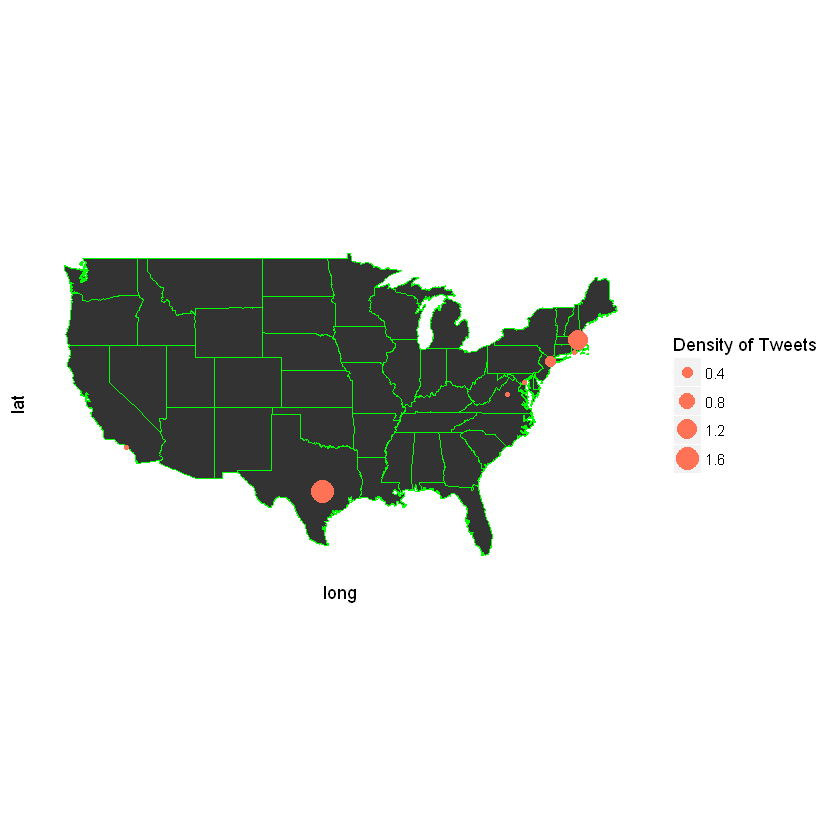

In [17]:
#load us map data
all_states <- map_data("state")
#plot all states with ggplot
p <- ggplot()
p <- p + geom_polygon( data=all_states, aes(x=long, y=lat, group = group),colour="green" )
p <- p + geom_point( data=grp_lat, aes(x=grp_lat[[1]], y=grp_lat[[2]], size = 0.2*(grp_lat[[4]])), color="coral1") + scale_size(name="Density of Tweets")
#p + geom_jitter( data=grp_lat, position=position_jitter(width=5, height=5), aes(x=grp_lat[[1]], y=grp_lat[[2]], size = 10*(grp_lat[[4]]),color=state)) + scale_size(name="Number of Tweets")
#p <- p + geom_text( data=grp_lat, hjust=0.5, vjust=-0.5, aes(x=long, y=lat, label=label), colour="gold2", size=4 )
p <- p + theme(panel.border = element_blank())
p <- p + theme(panel.background = element_blank())
p <- p + theme(axis.ticks = element_blank())
p <- p + theme(axis.text = element_blank()) + coord_fixed(1.3)
p